# Preparing Pokémon dataset

In [1]:
import os   # files and directories
import sys  # logging
from PIL import Image  # Image processings

In [2]:
raw_dataset = 'datasets/raw'
processed_dataset = 'datasets/pokémon'

In [3]:
raw_generations = [os.path.join(raw_dataset, g) for g in os.listdir(raw_dataset)]
print(raw_generations)

['datasets/raw/GenI', 'datasets/raw/GenII', 'datasets/raw/GenIII', 'datasets/raw/GenIV', 'datasets/raw/GenV']


In [4]:
def cut(image, size=64):
    im_width = int(image.width)
    im_height = int(image.height)
    num_width = int(im_width / size)
    num_height = int(im_height / size)
    images = []
    for h in range(num_height):
        for w in range(num_width):
            # box = (left, upper, right, lower)
            box = (size*w, size*h, size*(w+1), size*(h+1))
            images.append(image.crop(box))
    return images

In [5]:
def save(imgs, generation, img_file):
    img_file = img_file.split('/')[-1]
    img_cat = img_file.split('.')[0]
    img_dir = os.path.join(processed_dataset, 'Generation{}'.format(generation))
    if not os.path.isdir(img_dir):
        os.makedirs(img_dir)
    for i, img in enumerate(imgs):
        filename = os.path.join(img_dir, '{}-{}.png'.format(img_cat, i))
        img.save(filename)

In [6]:
img_size = 64
counter = 0
for n_gen, raw_gen in enumerate(raw_generations):
    n_gen += 1
    img_paths = [os.path.join(raw_gen, i) for i in os.listdir(raw_gen)]
    for n_img, img_file in enumerate(img_paths):
        try:
            img = Image.open(img_file)
            imgs = cut(img, size=img_size)
            save(imgs, generation=n_gen, img_file=img_file)
            counter += len(imgs)
            sys.stdout.write('\rGeneration: {}\t image: {:,} of {:}\tCounter: {:,}'.format(n_gen, n_img+1, len(img_paths), counter))
        except Exception as e:
            sys.stderr.write('{}'.format(e))

Generation: 5	 image: 181 of 181	Counter: 4,791

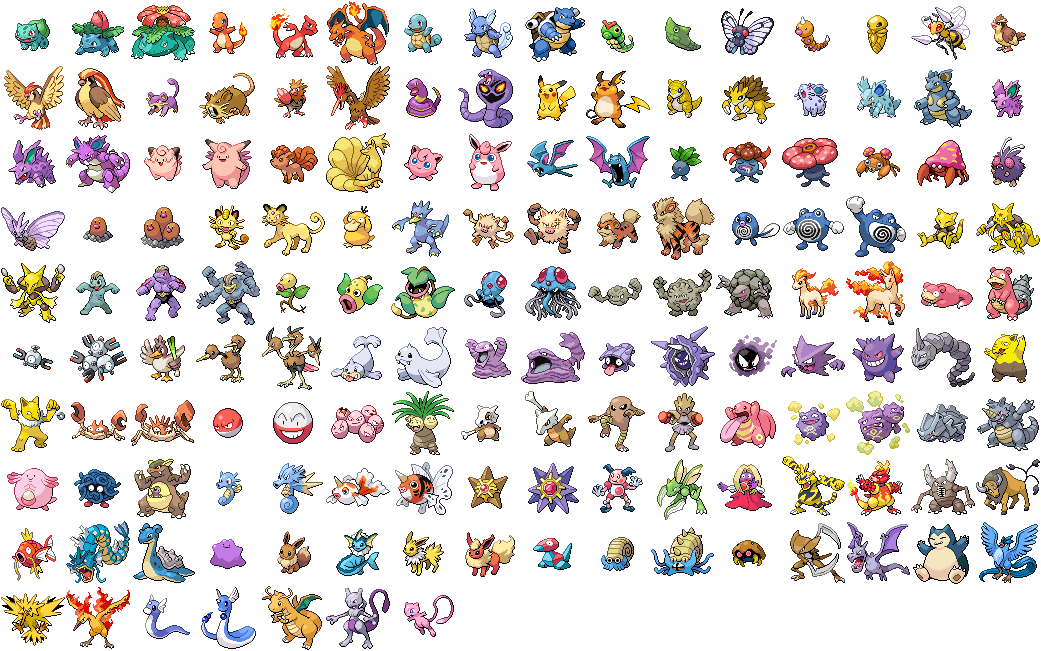

In [7]:
test_img = Image.open('datasets/raw/GenI/GenIA.png')
test_img